In [1]:
import sys

In [2]:
sys.path.append("../../")
sys.path.append("../")
sys.path.append('/Users/evgenia_k/Desktop/Y_Data/CitrusX_prj_New/xai-compare')

In [3]:
from sklearn.model_selection import train_test_split

# custom modules
from mlops_prj_ydata.dataset import german_credit_data, bank_marketing
from models.models import XGBClassifierWrapper

from xai_compare.comparison import FeatureElimination

import warnings
warnings.filterwarnings("ignore") 

2024-07-17 20:49:55.226 | INFO     | mlops_prj_ydata.config:<module>:11 - PROJ_ROOT path is: /Users/evgenia_k/Desktop/Y_Data/MLOps-prj-YData
Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


<h3>German credit risk dataset</h3>

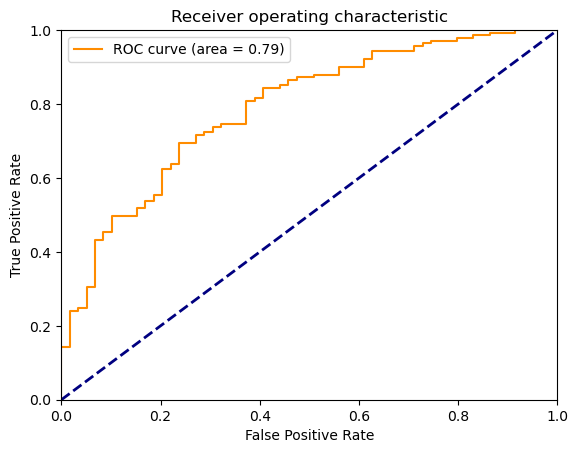

In [4]:
# get the data
X, y = german_credit_data()

# split into test and train
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X,y,test_size=0.2, random_state=1)

# create and fit the model
model = XGBClassifierWrapper()
model.fit(X_train_clean, y_train_clean, X_test_clean, y_test_clean)

# evaluate the model
model.evaluate(X_test_clean, y_test_clean)



In [5]:
params = {'model': model,
          'data': X,
          'target': y,
          'custom_explainer':None,
          'verbose': False,
          'mode': 'Classification'}

feature_elim = FeatureElimination(**params)

feature_elim.best_result()

Explainers:   0%|          | 0/3 [00:00<?, ?it/s]

TypeError: XGBClassifierWrapper.get_params() got an unexpected keyword argument 'deep'

In [14]:
from xgboost import XGBClassifier

In [15]:
tm = XGBClassifier()

In [17]:
tm.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [11]:
params = {'model': model,
          'data': X,
          'target': y,
          'custom_explainer':None,
          'verbose': False,
          'mode': 'Classification'}

feature_elim = FeatureElimination(**params)

feature_elim.best_result()

In [12]:
feature_elim.best_result()

Explainers:   0%|          | 0/3 [00:00<?, ?it/s]


TypeError: Cannot clone object '<models.models.XGBClassifierWrapper object at 0x1381aabf0>' (type <class 'models.models.XGBClassifierWrapper'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' method.

<h3>The bank marketing dataset</h3>

In [5]:
# get the data
X, y = bank_marketing()

# split into test and train
X_train_clean, X_test_clean, y_train_clean, y_test_clean = train_test_split(X,y,test_size=0.2, random_state=1)

<h2>Improving the model</h2>

In [6]:
import sys

In [8]:
sys.path.append('/Users/evgenia_k/Desktop/Y_Data/CitrusX_prj_New/xai-compare')

In [ ]:
params = {'model': model,
          'data': X,
          'target': y,
          'custom_explainer':None,
          'verbose': False,
          'mode': mode}

feature_elim = FeatureElimination(ComparisonFactory(**params).create(technique))